In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from hdf5storage import savemat
from hdf5storage import loadmat
import matplotlib.patches as mpatches
import matplotlib
import pickle

import sys
sys.path.append('../src')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import evaluation.eval_rank as eval_rank
import evaluation.eval_utils as eval_utils

In [6]:
data_path= '/data2/data/zebrahim/synthetic_dataset/data_8192_1000_3_4_4_.03_.03_.2' + 'processed_data.p'
with open(data_path, 'r') as fin:
    data = pickle.load(fin)
index_of_changes = data['index_of_changes']

#index of changes for test dataset
gt_test_idx_changes = index_of_changes[900:1000]
data_num_step = 8192

In [13]:
CNN1018 = loadmat("tuning/poc/pocCNN1018"+'.mat')['poc']
NWN2005 = loadmat("tuning/poc/pocDWN2001_paper"+'.mat')['poc']
CNN_LSTM4006 = loadmat("tuning/poc/pocCNN-LSTM4006"+'.mat')['poc']

In [ ]:
#NWN2001 = loadmat("tuning/poc/pocDWN2005"+'.mat')['poc']

In [14]:
cpd_val1018, cpd1018 = eval_rank.non_max_supression(CNN1018, 15, data_num_step)
cpd_val2005, cpd2005 = eval_rank.non_max_supression(NWN2005, 15, data_num_step)
cpd_val4006, cpd4006 = eval_rank.non_max_supression(CNN_LSTM4006, 15, data_num_step)

In [15]:
def tolerance_auc(cpd_val, cpd, gt_mean_test, tolerance):
    out_put = []
    for t in tolerance:
        out = eval_rank.ranking(cpd_val, cpd, gt_mean_test, t)
        out_put.append(eval_utils.calc_auc(zip(out[0], out[1]), gt_mean_test))
        
    return out_put    

In [16]:
tolerance = [8, 16, 32, 64, 128, 256, 512]
tol_auc1018 = tolerance_auc(cpd_val1018, cpd1018, index_of_changes, tolerance)
tol_auc2005 = tolerance_auc(cpd_val2005, cpd2005, index_of_changes, tolerance)
tol_auc4006 = tolerance_auc(cpd_val4006, cpd4006, index_of_changes, tolerance)

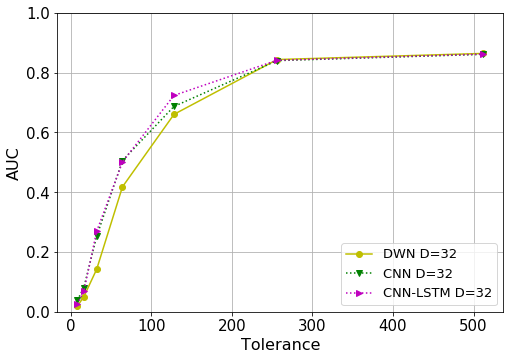

In [17]:
plt.figure(figsize=(8,5.5))
plt.plot(tolerance,tol_auc2005,'-oy',label ='DWN D=32')
plt.plot(tolerance,tol_auc1018,':vg',label ='CNN D=32')
plt.plot(tolerance,tol_auc4006,'>:m',label ='CNN-LSTM D=32')

font = {'family' : 'normal',
        'size'   : 15
         }

matplotlib.rc('font', **font)

plt.legend(loc='lower right', fontsize = 13)
plt.ylim([0,1], )
plt.grid()
plt.xlabel('Tolerance', fontsize = 16)
plt.ylabel('AUC', fontsize = 16)

# show the results
plt.show()

#save the results
#plt.savefig('../plot/plt1.png', bbox_inches = 'tight')